In [7]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline

In [28]:
data = pd.read_csv("wine.data", header=None)
data = data[1].values

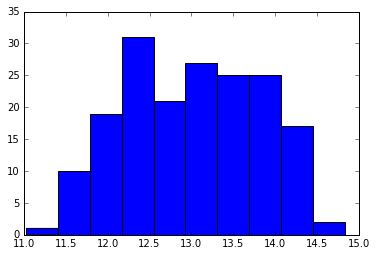

In [29]:
plt.hist(data);

Критерий инверсий проверки случайности выборки.

In [30]:
def inversions_criterion(sample):
    x = np.array(sample)
    n = len(x)
    
    upper_triangular = np.arange(n).reshape((-1, 1)) < np.arange(n).reshape((1, -1))
    x_upper_triangular = x.reshape((-1, 1)) > x.reshape((1, -1))
    I = (x_upper_triangular * upper_triangular).sum()
    
    mean = n * (n - 1) / 4
    var = (2 * n ** 3 + 3 * n ** 2 - 5 * n) / 72
    T = (I - mean) / np.sqrt(var)
    return T, 2 * sps.norm.sf(np.abs(T))

In [38]:
p_values = []
inversions_results = inversions_criterion(data)
print inversions_results
p_values.append(inversions_results[1])

(4.4558993866177437, 8.354220863976737e-06)


Критерии нормальности.

In [39]:
anderson_results = sps.anderson(data)
print(anderson_results)
p_values.append(0.01)  # Статистика близка критическому значению для уровня значимости 0.01

AndersonResult(statistic=1.033535193740903, critical_values=array([ 0.564,  0.642,  0.77 ,  0.899,  1.069]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [40]:
ks_results = sps.kstest(data, cdf='norm')
print ks_results
p_values.append(ks_results[1])

KstestResult(statistic=1.0, pvalue=0.0)


In [42]:
dagostion_results = sps.normaltest(data)
print dagostion_results
p_values.append(dagostion_results[1])

NormaltestResult(statistic=15.963552699056713, pvalue=0.00034163202531285264)


In [44]:
shapiro_results = sps.shapiro(data)
print shapiro_results
p_values.append(shapiro_results[1])

(0.9818047285079956, 0.02005171775817871)


Нельзя использовать критерий Жарка-Бера, т.к. размер выборки много меньше 2000.

Проведём поправку на множественную проверку гипотез. Используем метод Холма, т.к. это мощнейшая из процедур, контролирующих FWER, если характер зависимости между статистиками неизвестен (в нашем случае статистики считаются по одной и той же выборке, поэтому они могут быть зависимы).

In [49]:
multipletests(p_values, method='holm')

(array([ True,  True,  True,  True,  True], dtype=bool),
 array([  3.34168835e-05,   2.00000000e-02,   0.00000000e+00,
          1.02489608e-03,   2.00517178e-02]),
 0.010206218313011495,
 0.01)

Т.о. обе гипотезы отвергаются различными критериями с контролем FWER на уровне 0.021